<div style="background: #000;
            color: #FFF;
            margin: 0px;
                padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <span style="margin-left: -15px;"><img src="https://tkhv2-static.s3.amazonaws.com/static-final/assets/img/sec_logo2sec.png"></img></span>
    <h2 style="margin: 0; padding: 0;">Data Science Fellowship</h2>
    <h1 style="padding: 0px 0px 0px 0px;">Week 16 - Class 1 - 01/19</h1>
</div>

## Objectives for this week:
* Introduction to Data Science
* Introduction to Statistical Analysis
* Statistical Libraries in Python

## Todays Agenda
* Generators
* Binary
* Probability

<a href="#" id="hw"></a>
<div style="background: #000;
            color: #FFF;
            margin: 0px;
                padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 style="padding: 0px 0px 0px 0px;">Homework Presentations</h1>
</div>

### Exercise 1:
(due Jan 19th)

Given a positive integer, return its corresponding column title as appear in an Excel sheet.

For example:

```
    1 -> A
    2 -> B
    3 -> C
    ...
    26 -> Z
    27 -> AA
    28 -> AB 
    ...
```

`Example 1:`  
__Input__: 1  
__Output__: "A"  

`Example 2:`  
__Input__: 28  
__Output__: "AB"  

`Example 3:`   
__Input__: 701    
__Output__: "ZY"  

In [1]:
def ex1(num):
    if num <= 26:
        return chr(num + 64)
    else:
        f_char = chr(num // 26 + 64)
        l_char = chr(num % 26 + 64)
        return ''.join([f_char, l_char])

try:
    assert(ex1(1) == "A")
    assert(ex1(28) == "AB")
    assert(ex1(701) == "ZY")
    print("solution is correct")
except AssertionError:
    print("solution is incorrect")

solution is correct


In [2]:
#Bryant's answer
def ex1(num):
    if num <= 26:
        return chr(num + 64)
    else:
        f_char = chr(num // 26 + 64)
        l_char = chr(num % 26 + 64)
        return f'{f_char}{l_char}'

<a href="#" id="hw"></a>
<div style="background: #000;
            color: #FFF;
            margin-bottom: 10px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 style="padding: 0px 0px 0px 0px;">Generators in Python</h1>
</div>

Some built in methods we should be aware of:

`iter(n)` - takes iterable `n` and returns an iterator object.

`next(m)` - takes an iterator `m` and returns the next generated value.

# Iterables

Iterables are objects in python that are containers that hold data that can be iterated through. This is where they get the name "iterable" from, because they are able to be iterated through. All values in iterables exist at runtime whch means large iterables take up available memory.

In [3]:
for i in range(10000):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159


3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982
3983
3984
3985
3986
3987
3988
3989
3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052


5971
5972
5973
5974
5975
5976
5977
5978
5979
5980
5981
5982
5983
5984
5985
5986
5987
5988
5989
5990
5991
5992
5993
5994
5995
5996
5997
5998
5999
6000
6001
6002
6003
6004
6005
6006
6007
6008
6009
6010
6011
6012
6013
6014
6015
6016
6017
6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6058
6059
6060
6061
6062
6063
6064
6065
6066
6067
6068
6069
6070
6071
6072
6073
6074
6075
6076
6077
6078
6079
6080
6081
6082
6083
6084
6085
6086
6087
6088
6089
6090
6091
6092
6093
6094
6095
6096
6097
6098
6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110
6111
6112
6113
6114
6115
6116
6117
6118
6119
6120
6121
6122
6123
6124
6125
6126
6127
6128
6129
6130
6131
6132
6133
6134
6135
6136
6137
6138
6139
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6168
6169
6170


7721
7722
7723
7724
7725
7726
7727
7728
7729
7730
7731
7732
7733
7734
7735
7736
7737
7738
7739
7740
7741
7742
7743
7744
7745
7746
7747
7748
7749
7750
7751
7752
7753
7754
7755
7756
7757
7758
7759
7760
7761
7762
7763
7764
7765
7766
7767
7768
7769
7770
7771
7772
7773
7774
7775
7776
7777
7778
7779
7780
7781
7782
7783
7784
7785
7786
7787
7788
7789
7790
7791
7792
7793
7794
7795
7796
7797
7798
7799
7800
7801
7802
7803
7804
7805
7806
7807
7808
7809
7810
7811
7812
7813
7814
7815
7816
7817
7818
7819
7820
7821
7822
7823
7824
7825
7826
7827
7828
7829
7830
7831
7832
7833
7834
7835
7836
7837
7838
7839
7840
7841
7842
7843
7844
7845
7846
7847
7848
7849
7850
7851
7852
7853
7854
7855
7856
7857
7858
7859
7860
7861
7862
7863
7864
7865
7866
7867
7868
7869
7870
7871
7872
7873
7874
7875
7876
7877
7878
7879
7880
7881
7882
7883
7884
7885
7886
7887
7888
7889
7890
7891
7892
7893
7894
7895
7896
7897
7898
7899
7900
7901
7902
7903
7904
7905
7906
7907
7908
7909
7910
7911
7912
7913
7914
7915
7916
7917
7918
7919
7920


9649
9650
9651
9652
9653
9654
9655
9656
9657
9658
9659
9660
9661
9662
9663
9664
9665
9666
9667
9668
9669
9670
9671
9672
9673
9674
9675
9676
9677
9678
9679
9680
9681
9682
9683
9684
9685
9686
9687
9688
9689
9690
9691
9692
9693
9694
9695
9696
9697
9698
9699
9700
9701
9702
9703
9704
9705
9706
9707
9708
9709
9710
9711
9712
9713
9714
9715
9716
9717
9718
9719
9720
9721
9722
9723
9724
9725
9726
9727
9728
9729
9730
9731
9732
9733
9734
9735
9736
9737
9738
9739
9740
9741
9742
9743
9744
9745
9746
9747
9748
9749
9750
9751
9752
9753
9754
9755
9756
9757
9758
9759
9760
9761
9762
9763
9764
9765
9766
9767
9768
9769
9770
9771
9772
9773
9774
9775
9776
9777
9778
9779
9780
9781
9782
9783
9784
9785
9786
9787
9788
9789
9790
9791
9792
9793
9794
9795
9796
9797
9798
9799
9800
9801
9802
9803
9804
9805
9806
9807
9808
9809
9810
9811
9812
9813
9814
9815
9816
9817
9818
9819
9820
9821
9822
9823
9824
9825
9826
9827
9828
9829
9830
9831
9832
9833
9834
9835
9836
9837
9838
9839
9840
9841
9842
9843
9844
9845
9846
9847
9848


In [4]:
# if we want to free up space--- so we use DASK-- we can make numpy arrays and pandas

In [5]:
d = {'a':1, 'b':2, 'c':3}
for i,j in d.items():
    print(f"{i}:{j}")

a:1
b:2
c:3


# Iterators

Iterators are also data structures that can be iterated through but they involve the creation of an iterator method that controls how the next value is generated. This is where it gets the name from, it is something that can interate (in latin, the -or suffix is used to describe a noun that can perform an action). The values of an iterator might not exist at run time but each object that is an iterator can produce next values.

We can use the `iter` method to create iterators from iterables.

In [6]:
e = iter(d)

In [7]:
next(e)   #next will give us the next value of the next iterator

'a'

### creating our own iterator

To create our own iterator, we can use some special dunder methods (`__iter__` and `__next__`) to create the ability to generate next values. We must also use a special exception `StopIteration` in order to tell the iterator when to stop.

In [8]:
class even_range:
    def __init__(self, n):
        self.i = 0
        self.n = n
        
    def __iter__(self):
        # returns iterator
        return self
    
    def __next__(self):
        # generates the next value
        if self.i < self.n:
            i = self.i
            self.i += 2
            return i
        else: # if self.i > self.n we exit 
            raise StopIteration()

In [9]:
s = even_range(30)

In [10]:
next(s)

0

In [11]:
list(even_range(30))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]

In [12]:
sum(even_range(30))

210

# Generators

Generators are an easier to use method of creating iterators. Instead of needing to create a class with special dunders, we can simply write a function that, instead of returning values, yields them instead. Each time the function is ran, it will remember the last output and use that to generate the next one.

In [13]:
def even_range(n):
    i = 0
    while i < n:
        yield i
        # even though the yield is above, the next line is ran
        i += 2

In [14]:
e = even_range(30)

In [15]:
next(e)

0

# Generator Expressions

Generator expressions are similar to list comprehensions, except all of the values aren't generated at once. You can think of it as a comprehension that returns an iterator as opposed to a iterable.

In [16]:
a = (x * 2 for x in range(30 // 2))

In [17]:
next(a)

0

In [18]:
list(a)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]

We can use generator expressions wherever we've used list comprehensions. Python is a functional programming language and generators work with a lot of functional python.

In [19]:
sum(x*2 for x in range(30//2))  #if its surrounded by parentesis instead of brackets
#it turns it into a generator- and then we can pass that generator directly in sum. 
#this helps so that we don't have to make a list that will be stored in memor

210

In [20]:
list((x*2 for x in range(30//2)))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]

In [21]:
list(enumerate(x*2 for x in range(30//2)))

[(0, 0),
 (1, 2),
 (2, 4),
 (3, 6),
 (4, 8),
 (5, 10),
 (6, 12),
 (7, 14),
 (8, 16),
 (9, 18),
 (10, 20),
 (11, 22),
 (12, 24),
 (13, 26),
 (14, 28)]

This is why we always seem to use list comprehensions. In more advanced python development, we try to use generators since they don't require all values to be available at runtime. We can generate values as we need them which is easier on memory usage.

<a href="#" id="hw"></a>
<div style="background: #000;
            color: #FFF;
            margin-bottom: 10px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 style="padding: 0px 0px 0px 0px;">Binary</h1>
</div>


We should be aware of the following built in methods:
    
`bin(i)` - takes integer `i` and returns binary representation

# Bits and Bytes

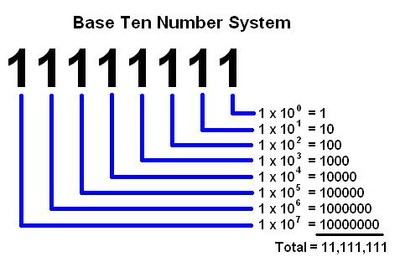

Humans use a base-10 numbering system. For each digit, the possible values are `0-9`. If a digit overflows (say we had `9` in the `ones` digit and we added one to it), it carries over into the next digit (`tens` digit).

Say we took the number `129`. We can split this into each digit.

1, 2 and 9. Each digit corresponding to a specific value.

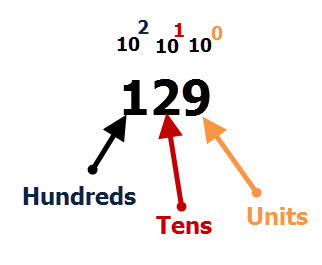

This works out to the following:

`100 + 20 + 9` 

Each digit being multiplied by a power of 10.

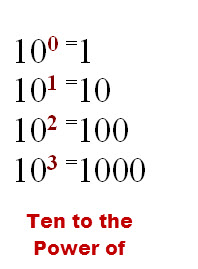

Computers use a base-2 numbering system due to the nature of electronic components. It is far simpler for electrical circuits to operate in a binary fashion without error (e.g. a circuit can either be on or off, which corresponds to 0 or 1 in binary). Because computers use base-2, we often are constrained by binary when programming.

We can do the same that we did to the base-10 numbers but use powers of 2 instead.

Say we had the binary number `101`

This has `1`, `0`, and `1` in three corresponding digits.

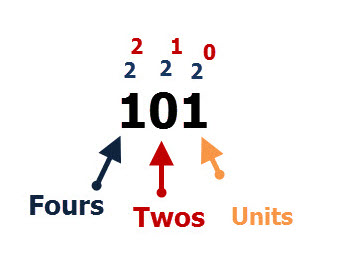

We can do the same as we did with the base-10 number but multiply it by powers of 2s instead.

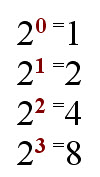

Which means `101` in binary is equal to:

4 + 0 + 1 = 5 (in base-10)

We can verify this using python:

In [22]:
bin(5), int('101', 2)

('0b101', 5)

In [23]:
bin(0), bin(1), bin(100)

('0b0', '0b1', '0b1100100')

There are special operations we can do on binary numbers.

addition - can be performed the same as base-10 addition except adding `1` to `1` results in a 0 in that place and a `1` carrying over to the next digit.

example:
`101` + `001` -> `110`

In [24]:
int('101',2) 

5

In [25]:
int('101',2) + int('001',2)

6

In [26]:
bin(6)

'0b110'

subtraction - can be performed the same as base-10 addition except subtracting `1` from `0` requires a subtraction from the digit before 

example: `110` - `001` = `011`

We can verify this using python.

In [27]:
int('110', 2) - int('001', 2)

5

In [28]:
bin(5)

'0b101'

In [29]:
int('101',2)

5

We can also do logical operations:
* `and`
* `or`
* `xor`

__and__ - 

`100 & 001`


In [30]:
int('100', 2) & int('001',2)

0

In [31]:
bin(0)

'0b0'

`111 & 111`

In [32]:
int('111',2) & int('111',2)

7

In [33]:
bin(7)

'0b111'

__or__ 

`101 | 010`

In [34]:
int('101',2) | int('010',2)

7

In [35]:
bin(7)

'0b111'

__xor__ 

```
INPUT      OUTPUT
A B        A XOR B
0 0          0
0 1          1
1 0          1
1 1          0 
```

`101 | 010`

In [36]:
int('101',2) ^ int('010',2)

7

In [37]:
bin(7)

'0b111'

We can also see the bit length of any python int.

In [38]:
num = 4
num.bit_length()

3

In [39]:
bin(num)

'0b100'

### We often see C types being used in numpy and pandas.

Here's what they mean:  
unsigned short int - 16 bits - range 0 to 65,535   
signed short int - 16 bits - range -32,767, +32,767

unsigned long int - 32 bits - range 0 to 4,294,967,295  
signed long int - 32 bits - range −2,147,483,647 to +2,147,483,647  

unsigned long long int - 64 bits - range 0 to  +18,446,744,073,709,551,615  
signed long long int - 64 bits - range −9,223,372,036,854,775,807 to +9,223,372,036,854,775,807

float - 32 bits - range 1.17549 x 10^-38 to 3.40282 x 10^38   

double - either 96 or 128 bit - range 2.22507 x 10^-308 to 1.79769 x 10^308

so if you see `np.uint64` - that means it's a numpy unsigned 64 bit integer capable of holding numbers as large as 18,446,744,073,709,551,615


In [40]:
#you will use unsign---> unint64 when you can only have positive numbers in your array. 
#signs - int64--> you can have smaller numbers but you can also have negative numbers

#doubles are double than floats

<a href="#" id="hw"></a>
<div style="background: #000;
            color: #FFF;
            margin-bottom: 10px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 style="padding: 0px 0px 0px 0px;">Probability</h1>
</div>


<div style="text-align: right">Excepted from Peter Norvig, 12 Feb 2016</div> 

# A Concrete Introduction to Probability (using Python)




This notebook covers the basics of probability theory, with Python 3 implementations. (You should have some background in [probability](http://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/pdf.html) and [Python](https://www.python.org/about/gettingstarted/).) 


In 1814, Pierre-Simon Laplace [wrote](https://en.wikipedia.org/wiki/Classical_definition_of_probability):

>*Probability ... is thus simply a fraction whose numerator is the number of favorable cases and whose denominator is the number of all the cases possible ... when nothing leads us to expect that any one of these cases should occur more than any other.*

![Laplace](https://upload.wikimedia.org/wikipedia/commons/thumb/3/30/AduC_197_Laplace_%28P.S.%2C_marquis_de%2C_1749-1827%29.JPG/180px-AduC_197_Laplace_%28P.S.%2C_marquis_de%2C_1749-1827%29.JPG)
<center><a href="https://en.wikipedia.org/wiki/Pierre-Simon_Laplace">Pierre-Simon Laplace</a><br>1814</center>


Laplace really nailed it, way back then! If you want to untangle a probability problem, all you have to do is be methodical about defining exactly what the cases are, and then careful in counting the number of favorable and total cases. We'll start being methodical by defining some vocabulary:


- **[Experiment](https://en.wikipedia.org/wiki/Experiment_(probability_theory%29):**
  An occurrence with an uncertain outcome that we can observe.
  <br>*For example, rolling a die.*
- **[Outcome](https://en.wikipedia.org/wiki/Outcome_(probability%29):**
  The result of an experiment; one particular state of the world. What Laplace calls a "case."
  <br>*For example:* `4`.
- **[Sample Space](https://en.wikipedia.org/wiki/Sample_space):**
  The set of all possible outcomes for the experiment. 
  <br>*For example,* `{1, 2, 3, 4, 5, 6}`.
- **[Event](https://en.wikipedia.org/wiki/Event_(probability_theory%29):**
  A subset of possible outcomes that together have some property we are interested in.
  <br>*For example, the event "even die roll" is the set of outcomes* `{2, 4, 6}`. 
- **[Probability](https://en.wikipedia.org/wiki/Probability_theory):**
  As Laplace said, the probability of an event with respect to a sample space is the number of favorable cases (outcomes from the sample space that are in the event) divided by the total number of cases in the sample space. (This assumes that all outcomes in the sample space are equally likely.) Since it is a ratio, probability will always be a number between 0 (representing an impossible event) and 1 (representing a certain event).
<br>*For example, the probability of an even die roll is 3/6 = 1/2.*

# Code for `P` 

`P` is the traditional name for the Probability function:

In [41]:
from fractions import Fraction

def P(event, space): 
    "The probability of an event, given a sample space of equiprobable outcomes."
    return Fraction(len(event & space), 
                    len(space))

In [42]:
P({1,2,3},{1,2,3,4,5,6})

Fraction(1, 2)

Read this as implementing Laplace's quote directly: *"Probability is thus simply a fraction whose numerator is the number of favorable cases and whose denominator is the number of all the cases possible."* 
 

# Warm-up Problem: Die Roll

What's the probability of rolling an even number with a single six-sided fair die? 

We can define the sample space `D` and the event `even`, and compute the probability:

In [43]:
D    = {1, 2, 3, 4, 5, 6}
even = {   2,    4,    6}

P(even, D)

Fraction(1, 2)

It is good to confirm what we already knew.

You may ask: Why does the definition of `P` use `len(event & space)` rather than `len(event)`? Because I don't want to count outcomes that were specified in `event` but aren't actually in the sample space. Consider:

In [44]:
even = {2, 4, 6, 8, 10, 12} # it won't consider 8,10,12

P(even, D)

Fraction(1, 2)

Here, `len(event)` and `len(space)` are both 6, so if just divided, then `P` would be 1, which is not right.
The favorable cases are the *intersection* of the event and the space, which in Python is `(event & space)`.
Also note that I use `Fraction` rather than regular division because I want exact answers like 1/3, not 0.3333333333333333.



# Urn Problems

Around 1700, Jacob Bernoulli wrote about removing colored balls from an urn in his landmark treatise *[Ars Conjectandi](https://en.wikipedia.org/wiki/Ars_Conjectandi)*, and ever since then, explanations of probability have relied on [urn problems](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=probability%20ball%20urn). (You'd think the urns would be empty by now.) 

![Jacob Bernoulli](http://www2.stetson.edu/~efriedma/periodictable/jpg/Bernoulli-Jacob.jpg)
<center><a href="https://en.wikipedia.org/wiki/Jacob_Bernoulli">Jacob Bernoulli</a><br>1700</center>

For example, here is a three-part problem [adapted](http://mathforum.org/library/drmath/view/69151.html)  from mathforum.org:

> An urn contains 23 balls: 8 white, 6 blue, and 9 red.  We select six balls at random (each possible selection is equally likely). What is the probability of each of these possible outcomes:

> 1. all balls are red
2. 3 are blue, 2 are white, and 1 is red
3. exactly 4 balls are white

So, an outcome is a set of 6 balls, and the sample space is the set of all possible 6 ball combinations. We'll solve each of the 3 parts using our `P` function, and also using basic arithmetic; that is, *counting*. Counting is a bit tricky because:
- We have multiple balls of the same color. 
- An outcome is a *set* of balls, where order doesn't matter, not a *sequence*, where order matters.

To account for the first issue, I'll have 8 different white balls labelled `'W1'` through `'W8'`, rather than having eight balls all labelled `'W'`.  That makes it clear that selecting `'W1'` is different from selecting `'W2'`.

The second issue is handled automatically by the `P` function, but if I want to do calculations by hand, I will sometimes first count the number of *permutations* of balls, then get the number of *combinations* by dividing the number of permutations by *c*!, where *c* is the number of balls in a combination. For example, if I want to choose 2 white balls from the 8 available, there are 8 ways to choose a first white ball and 7 ways to choose a second, and therefore 8 &times; 7 = 56 permutations of two white balls. But there are only 56 / 2 = 28 combinations, because `(W1, W2)` is the same combination as `(W2, W1)`.

We'll start by defining the contents of the urn:

In [45]:
def cross(A, B):
    "The set of ways of concatenating one item from collection A with one from B."
    return {a + b 
            for a in A for b in B}

In [46]:
cross('W', '1234')

{'W1', 'W2', 'W3', 'W4'}

In [47]:
urn = cross('W', '12345678') | cross('B', '123456') | cross('R', '123456789') 

urn

{'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'R1',
 'R2',
 'R3',
 'R4',
 'R5',
 'R6',
 'R7',
 'R8',
 'R9',
 'W1',
 'W2',
 'W3',
 'W4',
 'W5',
 'W6',
 'W7',
 'W8'}

In [48]:
len(urn)

23

Now we can define the sample space, `U6`, as the set of all 6-ball combinations.  We use `itertools.combinations` to generate the combinations, and then join each combination into a string:

In [49]:
import itertools

def combos(items, n):
    "All combinations of n items; each combo as a concatenated str."
    return {' '.join(combo) 
            for combo in itertools.combinations(items, n)}

U6 = combos(urn, 6)

len(U6)

100947

I don't want to print all 100,947 members of the sample space; let's just peek at a random sample of them:

In [50]:
import random

random.sample(U6, 10)

['W7 R6 R8 B4 R2 W2',
 'B1 W5 W4 W6 R2 W8',
 'W5 R8 R9 B2 B3 W2',
 'R1 R7 W3 W1 W8 W2',
 'R7 W3 W6 B4 R9 B2',
 'W7 B6 R9 B2 B5 R4',
 'W5 W7 W6 R2 B2 W2',
 'R1 W3 R6 R5 R8 B3',
 'W3 B6 B4 R9 W8 B3',
 'W7 R6 R8 R2 W1 R4']

Is 100,947 really the right number of ways of choosing 6 out of 23 items, or  "23 choose 6", as  mathematicians [call it](https://en.wikipedia.org/wiki/Combination)?  Well, we can choose any of 23 for the first item, any of 22 for the second, and so on down to 18 for the sixth. But we don't care about the ordering of the six items, so we divide the product by 6! (the number of permutations of 6 things) giving us:

$$23 ~\mbox{choose}~ 6 = \frac{23 \cdot 22 \cdot 21 \cdot 20 \cdot 19 \cdot 18}{6!} = 100947$$

Note that $23 \cdot 22 \cdot 21 \cdot 20 \cdot 19 \cdot 18 = 23! \;/\; 17!$, so, generalizing, we can write:

$$n ~\mbox{choose}~ c = \frac{n!}{(n - c)! \cdot c!}$$

And we can translate that to code and verify that 23 choose 6 is 100,947:

In [51]:
from math import factorial

def choose(n, c):
    "Number of ways to choose c items from a list of n items."
    return factorial(n) // (factorial(n - c) * factorial(c))

In [52]:
choose(23, 6)

100947

Now we're ready to answer the 4 problems: 

### Urn Problem 1: what's the probability of selecting 6 red balls? 

In [53]:
red6 = {s for s in U6 if s.count('R') == 6}

P(red6, U6)

Fraction(4, 4807)

Let's investigate a bit more. How many ways of getting 6 red balls are there?

In [54]:
len(red6)

84

Why are there 84 ways?  Because there are 9 red balls in the urn, and we are asking how many ways we can choose 6 of them:

In [55]:
choose(9, 6)

84

So the probabilty of 6 red balls is then just 9 choose 6 divided by the size of the sample space:

In [56]:
P(red6, U6) == Fraction(choose(9, 6), 
                        len(U6))

True

### Urn Problem 2: what is the probability of 3 blue, 2 white, and 1 red?

In [57]:
b3w2r1 = {s for s in U6 if
          s.count('B') == 3 and s.count('W') == 2 and s.count('R') == 1}

P(b3w2r1, U6)

Fraction(240, 4807)

We can get the same answer by counting how many ways we can choose 3 out of 6 blues, 2 out of 8 whites, and 1 out of 9 reds, and dividing by the number of possible selections:

In [58]:
P(b3w2r1, U6) == Fraction(choose(6, 3) * choose(8, 2) * choose(9, 1), 
                          len(U6))

True

Here we don't need to divide by any factorials, because `choose` has already accounted for that. 

We can get the same answer by figuring: "there are 6 ways to pick the first blue, 5 ways to pick the second blue, and 4 ways to pick the third; then 8 ways to pick the first white and 7 to pick the second; then 9 ways to pick a red. But the order `'B1, B2, B3'` should count as the same as `'B2, B3, B1'` and all the other orderings; so divide by 3! to account for the permutations of blues, by 2! to account for the permutations of whites, and by 100947 to get a probability:

In [59]:
 P(b3w2r1, U6) == Fraction((6 * 5 * 4) * (8 * 7) * 9, 
                           factorial(3) * factorial(2) * len(U6))

True

### Urn Problem 3: What is the probability of exactly 4 white balls?

We can interpret this as choosing 4 out of the 8 white balls, and 2 out of the 15 non-white balls. Then we can solve it the same three ways:

In [60]:
w4 = {s for s in U6 if
      s.count('W') == 4}

P(w4, U6)

Fraction(350, 4807)

In [61]:
P(w4, U6) == Fraction(choose(8, 4) * choose(15, 2),
                      len(U6))

True

In [62]:
P(w4, U6) == Fraction((8 * 7 * 6 * 5) * (15 * 14),
                      factorial(4) * factorial(2) * len(U6))

True

# Revised Version of `P`, with more general events

To calculate the probability of an even die roll, I originally said

    even = {2, 4, 6}
    
But that's inelegant&mdash;I had to explicitly enumerate all the even numbers from one to six. If I ever wanted to deal with a twelve or twenty-sided die, I would have to go back and change  `even`.  I would prefer to define `even` once and for all like this:

In [63]:
def even(n): return n % 2 == 0

Now in order to make `P(even, D)` work, I'll have to modify `P` to accept an event as either
a *set* of outcomes (as before), or a *predicate* over outcomes&mdash;a function that returns true for an outcome that is in the event:

In [64]:
def P(event, space): 
    """The probability of an event, given a sample space of equiprobable outcomes.
    event can be either a set of outcomes, or a predicate (true for outcomes in the event)."""
    if is_predicate(event):
        event = such_that(event, space)
    return Fraction(len(event & space), len(space))

is_predicate = callable

def such_that(predicate, collection): 
    "The subset of elements in the collection for which the predicate is true."
    return {e for e in collection if predicate(e)}

Here we see how `such_that`, the new `even` predicate, and the new `P` work:

In [65]:
such_that(even, D)

{2, 4, 6}

In [66]:
P(even, D)

Fraction(1, 2)

In [67]:
D12 = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

such_that(even, D12)

{2, 4, 6, 8, 10, 12}

In [68]:
P(even, D12)

Fraction(1, 2)

Note: `such_that` is just like the built-in function `filter`, except `such_that` returns a set.

We can now define more interesting events using predicates; for example we can determine the probability that the sum of a three-dice roll is prime (using a definition of `is_prime` that is efficient enough for small `n`):

In [69]:
D3 = {(d1, d2, d3) for d1 in D for d2 in D for d3 in D}

def prime_sum(outcome): return is_prime(sum(outcome))

def is_prime(n): return n > 1 and not any(n % i == 0 for i in range(2, n))

P(prime_sum, D3)

Fraction(73, 216)

In [70]:
73/216.

0.33796296296296297

# Card Problems

Consider dealing a hand of five playing cards. We can define `deck` as a set of 52 cards, and `Hands` as the sample space of all combinations of 5 cards:

In [71]:
suits = 'SHDC'
ranks = 'A23456789TJQK'
deck  = cross(ranks, suits)
len(deck)

52

In [72]:
Hands = combos(deck, 5)

assert len(Hands) == choose(52, 5)

random.sample(Hands, 5)

['AD 7C 5S 5H AS',
 '3D TH 5D 6C 3S',
 '7D AD KC 2C 4H',
 'AD 5D 6C 4H 5C',
 'TD 4D 5H KD 9H']

Now we can answer questions like the probability of being dealt a flush (5 cards of the same suit):

In [73]:
def flush(hand):
    return any(hand.count(suit) == 5 for suit in suits)

P(flush, Hands)

Fraction(33, 16660)

Or the probability of four of a kind:

In [74]:
def four_kind(hand):
    return any(hand.count(rank) == 4 for rank in ranks)

P(four_kind, Hands)

Fraction(1, 4165)

# Fermat and Pascal: Gambling, Triangles, and the Birth of Probability

<table>
<tr><td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/Pierre_de_Fermat2.png/140px-Pierre_de_Fermat2.png"><center><a href="https://en.wikipedia.org/wiki/Pierre_de_Fermat">Pierre de Fermat</a><br>1654
<td><img src="https://www.umass.edu/wsp/images/pascal.jpg"><center><a href="https://en.wikipedia.org/wiki/Blaise_Pascal">Blaise Pascal]</a><br>1654
</table>

Consider a gambling game consisting of tossing a coin. Player H wins the game if 10 heads come up, and T wins if 10 tails come up. If the game is interrupted when H has 8 heads and T has 7 tails, how should the pot of money (which happens to be 100 Francs) be split?
In 1654, Blaise Pascal and Pierre de Fermat corresponded on this problem, with Fermat [writing](http://mathforum.org/isaac/problems/prob1.html):

>Dearest Blaise,

>As to the problem of how to divide the 100 Francs, I think I have found a solution that you will find to be fair. Seeing as I needed only two points to win the game, and you needed 3, I think we can establish that after four more tosses of the coin, the game would have been over. For, in those four tosses, if you did not get the necessary 3 points for your victory, this would imply that I had in fact gained the necessary 2 points for my victory. In a similar manner, if I had not achieved the necessary 2 points for my victory, this would imply that you had in fact achieved at least 3 points and had therefore won the game. Thus, I believe the following list of possible endings to the game is exhaustive. I have denoted 'heads' by an 'h', and tails by a 't.' I have starred the outcomes that indicate a win for myself.

    h h h h *       h h h t *       h h t h *       h h t t *
    h t h h *       h t h t *       h t t h *       h t t t
    t h h h *       t h h t *       t h t h *       t h t t
    t t h h *       t t h t         t t t h         t t t t

>I think you will agree that all of these outcomes are equally likely. Thus I believe that we should divide the stakes by the ration 11:5 in my favor, that is, I should receive (11/16)*100 = 68.75 Francs, while you should receive 31.25 Francs.

>I hope all is well in Paris,

>Your friend and colleague,

>Pierre

Pascal agreed with this solution, and [replied](http://mathforum.org/isaac/problems/prob2.html) with a generalization that made use of his previous invention, Pascal's Triangle. There's even [a book](https://smile.amazon.com/Unfinished-Game-Pascal-Fermat-Seventeenth-Century/dp/0465018963?sa-no-redirect=1) about it.

We can solve the problem with the tools we have:

In [75]:
def win_unfinished_game(Hneeds, Tneeds):
    "The probability that H will win the unfinished game, given the number of points needed by H and T to win."
    def Hwins(outcome): return outcome.count('h') >= Hneeds
    return P(Hwins, continuations(Hneeds, Tneeds))

def continuations(Hneeds, Tneeds):
    "All continuations of a game where H needs `Hneeds` points to win and T needs `Tneeds`."
    rounds = ['ht' for _ in range(Hneeds + Tneeds - 1)]
    return set(itertools.product(*rounds))

In [76]:
continuations(2, 3)

{('h', 'h', 'h', 'h'),
 ('h', 'h', 'h', 't'),
 ('h', 'h', 't', 'h'),
 ('h', 'h', 't', 't'),
 ('h', 't', 'h', 'h'),
 ('h', 't', 'h', 't'),
 ('h', 't', 't', 'h'),
 ('h', 't', 't', 't'),
 ('t', 'h', 'h', 'h'),
 ('t', 'h', 'h', 't'),
 ('t', 'h', 't', 'h'),
 ('t', 'h', 't', 't'),
 ('t', 't', 'h', 'h'),
 ('t', 't', 'h', 't'),
 ('t', 't', 't', 'h'),
 ('t', 't', 't', 't')}

In [77]:
win_unfinished_game(2, 3)

Fraction(11, 16)

Our answer agrees with Pascal and Fermat; we're in good company!

# Non-Equiprobable Outcomes: Probability Distributions

So far, we have made the assumption that every outcome in a sample space is equally likely. In real life, we often get outcomes that are not equiprobable. For example, the probability of a child being a girl is not exactly 1/2, and the probability is slightly different for a second child. An [article](http://people.kzoo.edu/barth/math105/moreboys.pdf) gives the following counts for two-child families in Denmark, where `GB` means a family where the first child is a girl and the second a boy:

    GG: 121801    GB: 126840
    BG: 127123    BB: 135138
    
We will introduce three more definitions:

* [Frequency](https://en.wikipedia.org/wiki/Frequency_%28statistics%29): a number describing how often an outcome occurs. Can be a count like 121801, or a ratio like 0.515.

* [Distribution](http://mathworld.wolfram.com/StatisticalDistribution.html): A mapping from outcome to frequency for each outcome in a sample space. 

* [Probability Distribution](https://en.wikipedia.org/wiki/Probability_distribution): A distribution that has been *normalized* so that the sum of the frequencies is 1.

We define `ProbDist` to take the same kinds of arguments that `dict` does: either a mapping or an iterable of `(key, val)` pairs, and/or optional keyword arguments. 

In [78]:
class ProbDist(dict):
    "A Probability Distribution; an {outcome: probability} mapping."
    def __init__(self, mapping=(), **kwargs):
        self.update(mapping, **kwargs)
        # Make probabilities sum to 1.0; assert no negative probabilities
        total = sum(self.values())
        for outcome in self:
            self[outcome] = self[outcome] / total
            assert self[outcome] >= 0

We also need to modify the functions `P` and `such_that` to accept either a sample space  or a probability distribution as the second argument.

In [79]:
def P(event, space): 
    """The probability of an event, given a sample space of equiprobable outcomes. 
    event: a collection of outcomes, or a predicate that is true of outcomes in the event. 
    space: a set of outcomes or a probability distribution of {outcome: frequency} pairs."""
    if is_predicate(event):
        event = such_that(event, space)
    if isinstance(space, ProbDist):
        return sum(space[o] for o in space if o in event)
    else:
        return Fraction(len(event & space), len(space))
    
def such_that(predicate, space): 
    """The outcomes in the sample pace for which the predicate is true.
    If space is a set, return a subset {outcome,...};
    if space is a ProbDist, return a ProbDist {outcome: frequency,...};
    in both cases only with outcomes where predicate(element) is true."""
    if isinstance(space, ProbDist):
        return ProbDist({o:space[o] for o in space if predicate(o)})
    else:
        return {o for o in space if predicate(o)}

Here is the probability distribution for Danish two-child families:

In [80]:
DK = ProbDist(GG=121801, GB=126840,
              BG=127123, BB=135138)
DK

{'GG': 0.23840384261560926,
 'GB': 0.24826679089140383,
 'BG': 0.24882071317004043,
 'BB': 0.2645086533229465}

And here are some predicates that will allow us to answer some questions:

In [81]:
def first_girl(outcome):  return outcome[0] == 'G'
def first_boy(outcome):   return outcome[0] == 'B'
def second_girl(outcome): return outcome[1] == 'G'
def second_boy(outcome):  return outcome[1] == 'B'
def two_girls(outcome):   return outcome    == 'GG'

In [82]:
P(first_girl, DK)

0.4866706335070131

In [83]:
P(second_girl, DK)

0.4872245557856497

The above says that the probability of a girl is somewhere between 48% and 49%, but that it is slightly different between the first or second child.

In [84]:
P(second_girl, such_that(first_girl, DK)), P(second_girl, such_that(first_boy, DK))

(0.4898669165584115, 0.48471942072973107)

In [85]:
P(second_boy, such_that(first_girl, DK)), P(second_boy, such_that(first_boy, DK))

(0.5101330834415885, 0.5152805792702689)

The above says that the sex of the second child is more likely to be the same as the first child, by about 1/2 a percentage point.

# More Urn Problems: M&Ms and Bayes

Here's another urn problem (or "bag" problem) [from](http://allendowney.blogspot.com/2011/10/my-favorite-bayess-theorem-problems.html) prolific Python/Probability author [Allen Downey ](http://allendowney.blogspot.com/):

> The blue M&M was introduced in 1995.  Before then, the color mix in a bag of plain M&Ms was (30% Brown, 20% Yellow, 20% Red, 10% Green, 10% Orange, 10% Tan).  Afterward it was (24% Blue , 20% Green, 16% Orange, 14% Yellow, 13% Red, 13% Brown). 
A friend of mine has two bags of M&Ms, and he tells me that one is from 1994 and one from 1996.  He won't tell me which is which, but he gives me one M&M from each bag.  One is yellow and one is green.  What is the probability that the yellow M&M came from the 1994 bag?

To solve this problem, we'll first represent probability distributions for each bag: `bag94` and `bag96`:

In [86]:
bag94 = ProbDist(brown=30, yellow=20, red=20, green=10, orange=10, tan=10)
bag96 = ProbDist(blue=24, green=20, orange=16, yellow=14, red=13, brown=13)

Next, define `MM` as the joint distribution&mdash;the sample space for picking one M&M from each bag. The outcome `'yellow green'` means that a yellow M&M was selected from the 1994 bag and a green one from the 1996 bag.

In [87]:
def joint(A, B, sep=''):
    """The joint distribution of two independent probability distributions. 
    Result is all entries of the form {a+sep+b: P(a)*P(b)}"""
    return ProbDist({a + sep + b: A[a] * B[b]
                    for a in A
                    for b in B})

MM = joint(bag94, bag96, ' ')
MM

{'brown blue': 0.07199999999999997,
 'brown green': 0.05999999999999997,
 'brown orange': 0.04799999999999998,
 'brown yellow': 0.04199999999999998,
 'brown red': 0.038999999999999986,
 'brown brown': 0.038999999999999986,
 'yellow blue': 0.04799999999999998,
 'yellow green': 0.03999999999999999,
 'yellow orange': 0.03199999999999999,
 'yellow yellow': 0.02799999999999999,
 'yellow red': 0.025999999999999992,
 'yellow brown': 0.025999999999999992,
 'red blue': 0.04799999999999998,
 'red green': 0.03999999999999999,
 'red orange': 0.03199999999999999,
 'red yellow': 0.02799999999999999,
 'red red': 0.025999999999999992,
 'red brown': 0.025999999999999992,
 'green blue': 0.02399999999999999,
 'green green': 0.019999999999999993,
 'green orange': 0.015999999999999993,
 'green yellow': 0.013999999999999995,
 'green red': 0.012999999999999996,
 'green brown': 0.012999999999999996,
 'orange blue': 0.02399999999999999,
 'orange green': 0.019999999999999993,
 'orange orange': 0.015999999999999

First we'll look at the "One is yellow and one is green" part:

In [88]:
def yellow_and_green(outcome): return 'yellow' in outcome and 'green' in outcome

such_that(yellow_and_green, MM)

{'yellow green': 0.7407407407407408, 'green yellow': 0.25925925925925924}

Now we can answer the question: given that we got a yellow and a green (but don't know which comes from which bag), what is the probability that the yellow came from the 1994 bag?

In [89]:
def yellow94(outcome): return outcome.startswith('yellow')

P(yellow94, such_that(yellow_and_green, MM))

0.7407407407407408

So there is a 74% chance that the yellow comes from the 1994 bag.

Answering this question was straightforward: just like all the other probability problems, we simply create a sample space, and use `P` to pick out the probability of the event in question, given what we know about the outcome.
But in a sense it is curious that we were able to solve this problem with the same methodology as the others: this problem comes from a section titled **My favorite Bayes's Theorem Problems**, so one would expect that we'd need to invoke Bayes Theorem to solve it.  The computation above shows that that is not necessary. 

![Bayes](http://img1.ph.126.net/xKZAzeOv_mI8a4Lwq7PHmw==/2547911489202312541.jpg)
<center><a href="https://en.wikipedia.org/wiki/Thomas_Bayes">Rev. Thomas Bayes</a><br>1701-1761
</center>

Of course, we *could* solve it using Bayes Theorem. Why is Bayes Theorem recommended? Because we are asked about the probability of an event given the evidence, which is not immediately available; however the probability of the evidence given the event is.  

Before we see the colors of the M&Ms, there are two hypotheses, `A` and `B`, both with equal probability:

    A: first M&M from 94 bag, second from 96 bag
    B: first M&M from 96 bag, second from 94 bag
    P(A) = P(B) = 0.5
    
Then we get some evidence:
    
    E: first M&M yellow, second green
    
We want to know the probability of hypothesis `A`, given the evidence:
    
    P(A | E)
    
That's not easy to calculate (except by enumerating the sample space). But Bayes Theorem says:
    
    P(A | E) = P(E | A) * P(A) / P(E)
    
The quantities on the right-hand-side are easier to calculate:
    
    P(E | A) = 0.20 * 0.20 = 0.04
    P(E | B) = 0.10 * 0.14 = 0.014
    P(A)     = 0.5
    P(B)     = 0.5
    P(E)     = P(E | A) * P(A) + P(E | B) * P(B) 
             = 0.04     * 0.5  + 0.014    * 0.5   =   0.027
    
And we can get a final answer:
    
    P(A | E) = P(E | A) * P(A) / P(E) 
             = 0.04     * 0.5  / 0.027 
             = 0.7407407407
             
You have a choice: Bayes Theorem allows you to do less calculation at the cost of more algebra; that is a great trade-off if you are working with pencil and paper. Enumerating the state space allows you to do less algebra at the cost of more calculation; often a good trade-off if you have a computer. But regardless of the approach you use, it is important to understand Bayes theorem and how it works.

There is one important question that Allen Downey does not address: *would you  eat twenty-year-old M&Ms*?
&#128552;

# Newton's Answer to a Problem by Pepys

<table>
<tr><td><img src="http://scienceworld.wolfram.com/biography/pics/Newton.jpg"><center><a href="https://en.wikipedia.org/wiki/Isaac_Newton">Isaac Newton</a><br>1693</center>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Samuel_Pepys_portrait.jpg/148px-Samuel_Pepys_portrait.jpg"><center><a href="https://en.wikipedia.org/wiki/Samuel_Pepys">Samuel Pepys</a><br>1693</center>
</table>

[This paper](http://fermatslibrary.com/s/isaac-newton-as-a-probabilist) explains how  Samuel Pepys wrote to Isaac Newton in 1693 to pose the problem:

> Which of the following three propositions has the greatest chance of success? 
  1. Six fair dice are tossed independently and at least one “6” appears. 
  2. Twelve fair dice are tossed independently and at least two “6”s appear. 
  3. Eighteen fair dice are tossed independently and at least three “6”s appear.
  
Newton was able to answer the question correctly (although his reasoning was not quite right); let's see how we can do. Since we're only interested in whether a die comes up as "6" or not, we can define a single die and the joint distribution over *n* dice as follows:

In [90]:
die = ProbDist({'6':1/6, '-':5/6})

print(die)

{'6': 0.16666666666666666, '-': 0.8333333333333334}


In [91]:
def dice(n, die):
    "Joint probability from tossing n dice."
    if n == 1:
        return die
    else:
        return joint(die, dice(n - 1, die))

In [92]:
dice(3, die)

{'666': 0.0046296296296296285,
 '66-': 0.023148148148148143,
 '6-6': 0.023148148148148143,
 '6--': 0.11574074074074073,
 '-66': 0.023148148148148143,
 '-6-': 0.11574074074074073,
 '--6': 0.11574074074074073,
 '---': 0.5787037037037037}

Now we are ready to determine which proposition is more likely to have the required number of sixes:

In [93]:
def at_least(k, result): return lambda s: s.count(result) >= k

In [94]:
P(at_least(1, '6'), dice(6, die))

0.6651020233196159

In [95]:
P(at_least(2, '6'), dice(12, die))

0.6186673737323101

In [96]:
P(at_least(3, '6'), dice(18, die))

0.5973456859477544

We reach the same conclusion Newton did, that the best chance is rolling six dice.

<hr>

# Simulation

Sometimes it is inconvenient to explicitly define a sample space. Perhaps the sample space is infinite, or perhaps it is just very large and complicated, and we feel more confident in writing a program to *simulate* one pass through all the complications, rather than try to *enumerate* the complete sample space. *Random sampling* from the simulation
can give an accurate estimate of the probability.

# Simulating Monopoly

![](http://buckwolf.org/a.abcnews.com/images/Entertainment/ho_hop_go_050111_t.jpg)<center>[Mr. Monopoly](https://en.wikipedia.org/wiki/Rich_Uncle_Pennybags)<br>1940&mdash;

Consider [problem 84](https://projecteuler.net/problem=84) from the excellent [Project Euler](https://projecteuler.net), which asks for the probability that a player in the game Monopoly ends a roll on each of the squares on the board.  To answer this we need to take into account die rolls, chance and community chest cards, and going to jail (from the "go to jail" space, from a card, or from rolling doubles three times in a row). We do not need to take into account anything about buying or selling properties or exchanging money or winning or losing the game, because these don't change a player's location. We will assume that a player in jail will always pay to get out of jail immediately. 

A game of Monopoly can go on forever, so the sample space is infinite. But even if we limit the sample space to say, 1000 rolls, there are $21^{1000}$ such sequences of rolls (and even more possibilities when we consider drawing cards). So it is infeasible to explicitly represent the sample space.

But it is fairly straightforward to implement a simulation and run it for, say, 400,000 rolls (so the average square will be landed on 10,000 times).  Here is the code for a simulation:

In [97]:
from collections import Counter, deque
import random

# The board: a list of the names of the 40 squares
# As specified by https://projecteuler.net/problem=84
board = """GO   A1 CC1 A2  T1 R1 B1  CH1 B2 B3
           JAIL C1 U1  C2  C3 R2 D1  CC2 D2 D3 
           FP   E1 CH2 E2  E3 R3 F1  F2  U2 F3 
           G2J  G1 G2  CC3 G3 R4 CH3 H1  T2 H2""".split()

def monopoly(steps):
    """Simulate given number of steps of Monopoly game, 
    yielding the number of the current square after each step."""
    goto(0) # start at GO
    CC_deck = Deck('GO JAIL' + 14 * ' ?')
    CH_deck = Deck('GO JAIL C1 E3 H2 R1 R R U -3' + 6 * ' ?')
    doubles = 0
    jail = board.index('JAIL')
    for _ in range(steps):
        d1, d2 = random.randint(1, 6), random.randint(1, 6)
        goto(here + d1 + d2)
        doubles = (doubles + 1) if (d1 == d2) else 0
        if doubles == 3 or board[here] == 'G2J':  
            goto(jail)
        elif board[here].startswith('CC'):
            do_card(CC_deck)
        elif board[here].startswith('CH'):
            do_card(CH_deck)
        yield here         

def goto(square):
    "Update the global variable 'here' to be square."
    global here
    here = square % len(board)
                   
def Deck(names):
    "Make a shuffled deck of cards, given a space-delimited string."
    cards = names.split()
    random.shuffle(cards)
    return deque(cards)         

def do_card(deck):
    "Take the top card from deck and do what it says."
    global here
    card = deck[0]             # The top card
    deck.rotate(-1)            # Move top card to bottom of deck
    if card == 'R' or card == 'U': 
        while not board[here].startswith(card):
            goto(here + 1)     # Advance to next railroad or utility
    elif card == '-3':
        goto(here - 3)         # Go back 3 spaces
    elif card != '?':
        goto(board.index(card))# Go to destination named on card

And the results:

In [98]:
results = list(monopoly(400000))

I'll show a histogram of the squares, with a dotted red line at the average:

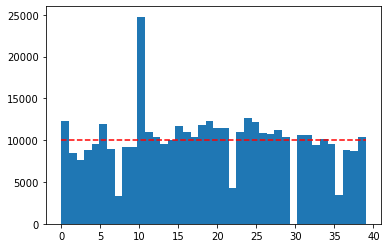

In [99]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.hist(results, bins=40)
avg = len(results) / 40
plt.plot([0, 39], [avg, avg], 'r--');

Another way to see the results:

In [100]:
ProbDist(Counter(board[i] for i in results))

{'T1': 0.0237275,
 'U1': 0.0259675,
 'E3': 0.03174,
 'G3': 0.025435,
 'JAIL': 0.06192,
 'R2': 0.029135,
 'CC2': 0.0260625,
 'D3': 0.030835,
 'CH2': 0.0106025,
 'F2': 0.0269175,
 'R1': 0.0298425,
 'C3': 0.02501,
 'F3': 0.025845,
 'T2': 0.0216525,
 'B1': 0.0223975,
 'R3': 0.0305825,
 'CC1': 0.01905,
 'C2': 0.0239425,
 'G2': 0.0264225,
 'A2': 0.0220525,
 'F1': 0.0270025,
 'CC3': 0.0235875,
 'H2': 0.02594,
 'B2': 0.0231075,
 'GO': 0.03084,
 'CH1': 0.0082325,
 'FP': 0.028685,
 'G1': 0.0266125,
 'A1': 0.0210575,
 'D1': 0.0273275,
 'U2': 0.02799,
 'D2': 0.0293925,
 'E2': 0.0274475,
 'B3': 0.0228725,
 'C1': 0.027535,
 'E1': 0.0285275,
 'H1': 0.022115,
 'CH3': 0.008695,
 'R4': 0.0238925}

There is one square far above average: `JAIL`, at a little over 6%. There are four squares far below average: the three chance squares, `CH1`, `CH2`, and `CH3`, at around 1% (because 10 of the 16 chance cards send the player away from the square), and the "Go to Jail" square, square number 30 on the plot, which has a frequency of 0 because you can't end a turn there. The other squares are around 2% to 3% each, which you would expect, because 100% / 40 = 2.5%.

# The Central Limit Theorem / Strength in Numbers Theorem

So far, we have talked of an *outcome* as being a single state of the world. But it can be useful to break that state of the world down into components. We call these components **random variables**. For example, when we consider an experiment in which we roll two dice and observe their sum, we could model the situation with two random variables, one for each die. (Our representation of outcomes has been doing that implicitly all along, when we concatenate two parts of a string, but the concept of a random variable makes it official.)

The **Central Limit Theorem** states that if you have a collection of random variables and sum them up, then the larger the collection, the closer the sum will be to a *normal distribution* (also called a *Gaussian distribution* or a *bell-shaped curve*). The theorem applies in all but a few pathological cases. 

As an example, let's take 5 random variables reprsenting the per-game scores of 5 basketball players, and then sum them together to form the team score. Each random variable/player is represented as a function; calling the function returns a single sample from the distribution:


In [101]:
from random import gauss, triangular, choice, vonmisesvariate, uniform

def SC(): return posint(gauss(15.1, 3) + 3 * triangular(1, 4, 13)) # 30.1
def KT(): return posint(gauss(10.2, 3) + 3 * triangular(1, 3.5, 9)) # 22.1
def DG(): return posint(vonmisesvariate(30, 2) * 3.08) # 14.0
def HB(): return posint(gauss(6.7, 1.5) if choice((True, False)) else gauss(16.7, 2.5)) # 11.7
def OT(): return posint(triangular(5, 17, 25) + uniform(0, 30) + gauss(6, 3)) # 37.0

def posint(x): "Positive integer"; return max(0, int(round(x)))

And here is a function to sample a random variable *k* times, show a histogram of the results, and return the mean:

In [102]:
from statistics import mean

def repeated_hist(rv, bins=10, k=100000):
    "Repeat rv() k times and make a histogram of the results."
    samples = [rv() for _ in range(k)]
    plt.hist(samples, bins=bins)
    return mean(samples)

The two top-scoring players have scoring distributions that are slightly skewed from normal:

30.10322

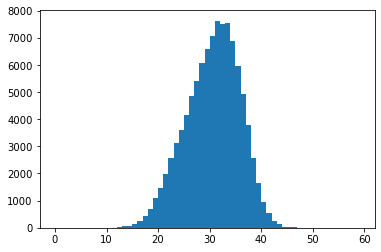

In [103]:
repeated_hist(SC, bins=range(60))

22.12843

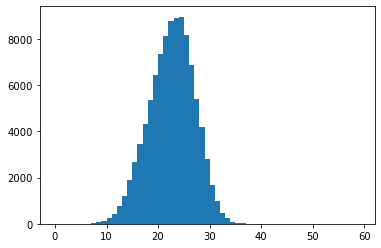

In [104]:
repeated_hist(KT, bins=range(60))

The next two players have bi-modal distributions; some games they score a lot, some games not:

14.01185

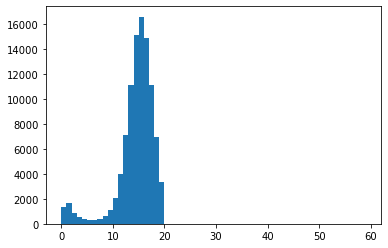

In [105]:
repeated_hist(DG, bins=range(60))

11.69317

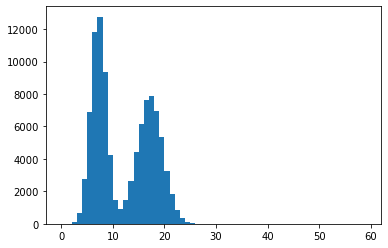

In [106]:
repeated_hist(HB, bins=range(60))

The fifth "player" (actually the sum of all the other players on the team) looks like this:

36.27054

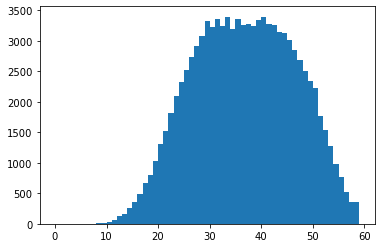

In [107]:
repeated_hist(OT, bins=range(60))

Now we define the team score to be the sum of the five players, and look at the distribution:

114.24596

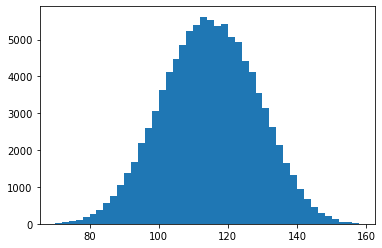

In [108]:
def GSW(): return SC() + KT() + DG() + HB() + OT()

repeated_hist(GSW, bins=range(70, 160, 2))

Sure enough, this looks very much like a normal distribution. The Central Limit Theorem appears to hold in this case. But I have to say "Central Limit" is not a very evocative name, so I propose we re-name this as the **Strength in Numbers Theorem**, to indicate the fact that if you have a lot of numbers, you tend to get the expected result.

# Conclusion

We've had an interesting tour and met some giants of the field: Laplace, Bernoulli, Fermat, Pascal, Bayes, Newton, ... even Mr. Monopoly and The Count.

![The Count](http://img2.oncoloring.com/count-dracula-number-thir_518b77b54ba6c-p.gif)
<center><a href="https://en.wikipedia.org/wiki/Count_von_Count">The Count</a><br>1972&mdash;</center>

The conclusion is: be explicit about what the problem says, and then methodical about defining the sample space, and finally be careful in counting the number of outcomes in the numerator and denominator. Easy as 1-2-3. 

<a href="#" id="hw"></a>
<div style="background: #000;
            color: #FFF;
            margin-bottom: 10px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 style="padding: 0px 0px 0px 0px;">Futher Reading</h1>
</div>

https://seeing-theory.brown.edu/basic-probability/index.html   
https://seeing-theory.brown.edu/doc/basic-probability.pdf  

[Probability Cheatsheet](https://github.com/georgearun/Data-Science--Cheat-Sheet/blob/master/Probability%20and%20Statistics/probability_cheatsheet.pdf)